![maf](../images/nvp.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow_probability as tfp
import tensorflow.keras as tfk
from utl import *
from load_data import *
tfd = tfp.distributions
tfb = tfp.bijectors

In [2]:
DTYPE=tf.float32
NP_DTYPE=np.float32
num_bijectors = 16
n_epochs = 1000
lr = 1e-3

In [3]:
X_data = load_moon_dataset()

(-2.0, 2.0)

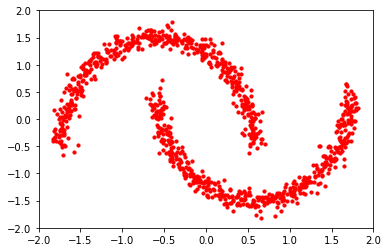

In [4]:
xlim, ylim = [-2, 2], [-2, 2]
plt.scatter(X_data[:, 0], X_data[:, 1], s=10, color='red')
plt.xlim(xlim)
plt.ylim(ylim)

In [5]:
base_dist = tfd.MultivariateNormalDiag(loc=tf.zeros([2], DTYPE), scale_diag=tf.ones([2], DTYPE))

In [6]:
def make_nvp_flow(base_dist, hidden_units=[16, 16], activation=tf.nn.relu):
  bijectors = []
  for i in range(num_bijectors):
    shift_and_log_scale_fn = tfb.real_nvp_default_template(hidden_layers=hidden_units, activation=activation)
    real_nvp = tfb.RealNVP(fraction_masked=0.5, shift_and_log_scale_fn=shift_and_log_scale_fn)
    permute = tfb.Permute(permutation=[1, 0])
    bijectors.append(real_nvp)
    bijectors.append(permute)
  
  # Discard the last Permute layer.
  flow_bijector = tfb.Chain(list(reversed(bijectors[:-1])))
  flow = tfd.TransformedDistribution(distribution=base_dist, bijector=flow_bijector)
  return flow

In [7]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tensorflow.compat.v1 import logging
logging.set_verbosity(logging.ERROR)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:2183: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


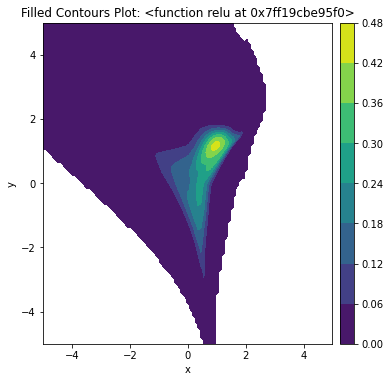

In [8]:
activation = tf.nn.relu
flow = make_nvp_flow(base_dist, activation=activation)
plot_contour_prob([flow], scale_fig=6, title=[activation])

In [9]:
# Make samples
names, samples = make_samples(base_dist, flow)

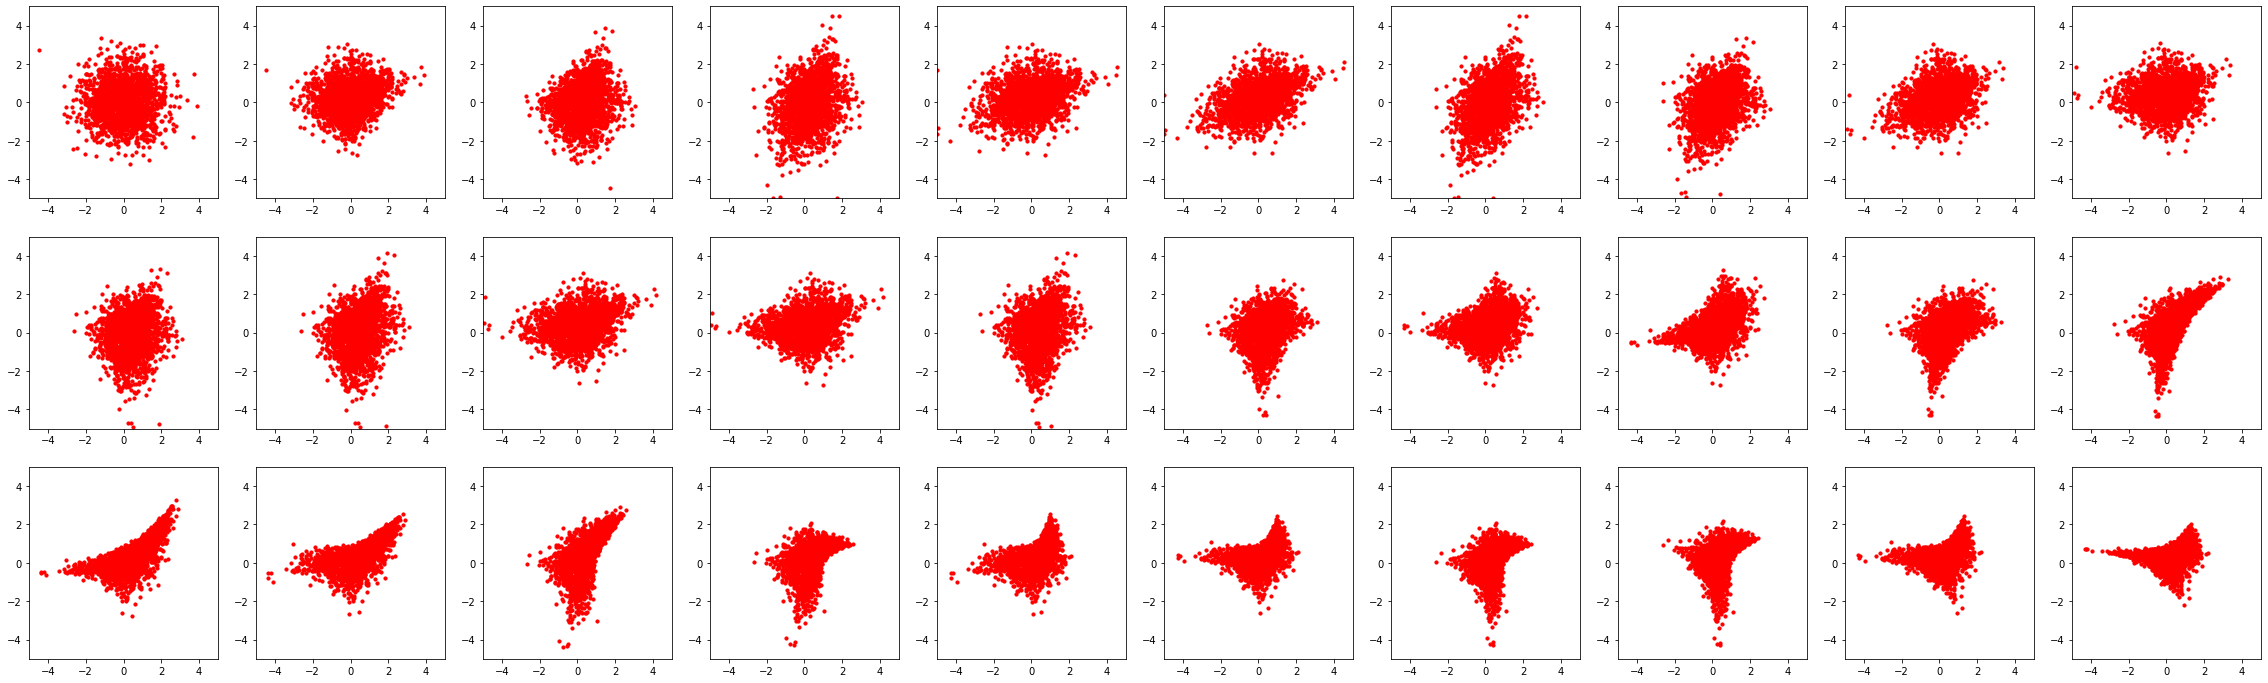

In [10]:
plot_samples(samples, names, rows=3)

# Training a RealNVP Bijector

In [11]:
history = train_dist_routine(X_data, flow, n_epochs=n_epochs, n_disp=int(n_epochs/50))

TypeError: The following are legacy tf.layers.Layers:
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188cd6fd0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188cd6810>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188cdb650>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188bd1b90>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188bcbf50>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff184b29550>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188bd1fd0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff185729410>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff184b29590>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188c00ed0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff185695f50>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff186dd45d0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188cdb310>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff186dafd90>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff186dbaa10>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188c2c650>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188c89450>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff186ee1910>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188c89050>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff186ee9a10>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff186df1190>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188c9d890>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188c81210>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1882bc090>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188c9d550>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff186ef5190>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff186f2f0d0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188c14490>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188d00710>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188516610>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188c14c90>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188512950>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188516110>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188d43e90>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188d3e550>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188640390>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188d43050>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1885a6e10>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188639e50>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188b83610>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188d65c50>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188726f10>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188b83650>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff18876e490>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff18877b290>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188b83f90>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188b9ae10>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188914e90>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188b83550>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1888cb410>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1888df810>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188c5d6d0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188c39a10>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1841b26d0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188c43c90>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff19a2346d0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff183ff7310>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff18454f810>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1845416d0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1855ba990>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff18453b890>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff184dd9e10>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff184de4890>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188d60850>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188be7410>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1888da690>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188c38110>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1888cb550>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1888da490>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff18459c2d0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff18459c990>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff185284e50>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff184565f90>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1856521d0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff18527a6d0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1845a2790>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1845d1c10>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1854bef10>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1845af3d0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1854af6d0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1854b9f50>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff184ae53d0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1845c37d0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff184ac86d0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188c495d0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff18460ef90>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff184b3c2d0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff184a351d0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff184587b10>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff186ad9b90>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff184a35190>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff186a9d690>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff186e50dd0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff184a23510>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff186e50f90>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff186e50790>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff186e89490>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff186f39fd0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff186e3a850>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff18843fe50>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1882c65d0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff18842c6d0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1885a0050>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1885b3110>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1885ba250>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1885fd910>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1886999d0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1885fd210>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188840b50>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff184617350>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff18880e850>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff184617610>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff18878a410>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188b79cd0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1851a7a90>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1846177d0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1886a1d50>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff185420c90>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188b79c50>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff18560e210>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1851b8810>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff184de6810>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff184c0c990>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff184cc7890>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff184cc7110>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1855cb3d0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1855cd550>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff184a4d890>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff188897b90>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff185302690>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1853026d0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff185475a10>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff18554d7d0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1846a1b50>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1852f9c10>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff185202d90>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1851e7e90>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff1854e4cd0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff184cb78d0>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff184cb7e90>
  <tensorflow.python.keras.legacy_tf_layers.core.Dense object at 0x7ff184cb71d0>
To use keras as a framework (for instance using the Network, Model, or Sequential classes), please use the tf.keras.layers implementation instead. (Or, if writing custom layers, subclass from tf.keras.layers rather than tf.layers)

In [ ]:
plot_loss(history)

In [ ]:
# Make samples
names, samples = make_samples(base_dist, flow)

In [ ]:
visualize_training_data(X_data, samples)

In [ ]:
plot_contour_prob([flow], scale_fig=6)